In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from joblib import Parallel, delayed
import os.path as osp
import pandas as pd
from itertools import product
from cPickle import load

In [68]:
FOLDER_DATA = '/data/shared/bvFTD/Machine_Learning/data'
TSNE_DATA = '/data/shared/bvFTD/Machine_Learning/data/TSNE'
X = np.load(osp.join(FOLDER_DATA, 'data_set.npy'))
group_labels = pd.read_csv(osp.join(FOLDER_DATA, 'class_labels.csv'))
id_ftd = group_labels.ftd.as_matrix()
id_neurol = group_labels.neurol.as_matrix()
id_psych = group_labels.psych.as_matrix()

In [64]:
tsne_params = np.load(osp.join(TSNE_DATA, 'tsne_params.npy'))
kl_div = np.load(osp.join(TSNE_DATA, 'kl_div.npy'))
embeddings = np.load(osp.join(TSNE_DATA, 'embeddings.npy'))

In [65]:
# masks zeros out
id_zeros = np.all(X == 0, axis=0)
X = X[:, ~id_zeros]

In [96]:
def make_scatter(data, id_ftd, id_neurol, id_psych):
    colors = ['r', 'g', 'b']
    plt.scatter(data[id_ftd, 0], data[id_ftd, 1], c=colors[0], s=30)
    if np.any(np.isnan(data)):
        plt.scatter(data[id_neurol, 0], data[id_neurol, 1], c=colors[1], s=30)
        plt.scatter(data[id_psych, 0], data[id_psych, 1], c=colors[1], s=30)
        plt.legend(['FTD', 'Rest'])
    else:
        plt.scatter(data[id_neurol, 0], data[id_neurol, 1], c=colors[1], s=30)
        plt.scatter(data[id_psych, 0], data[id_psych, 1], c=colors[2], s=30)
        plt.legend(['FTD', 'Neurological', 'Psychiatry'])
    plt.show()

In [71]:
pca = PCA(n_components=500)
X_pca = pca.fit_transform(X)

In [72]:
scaler = StandardScaler()
X_pca_scl = scaler.fit_transform(X_pca)

In [74]:
kl_div_min, kl_div_idx = kl_div.min(), kl_div.argmin()

In [75]:
print kl_div_min, kl_div_idx

9.61313137662 6194


In [95]:
np.any(np.isnan(embeddings[6196]))

True

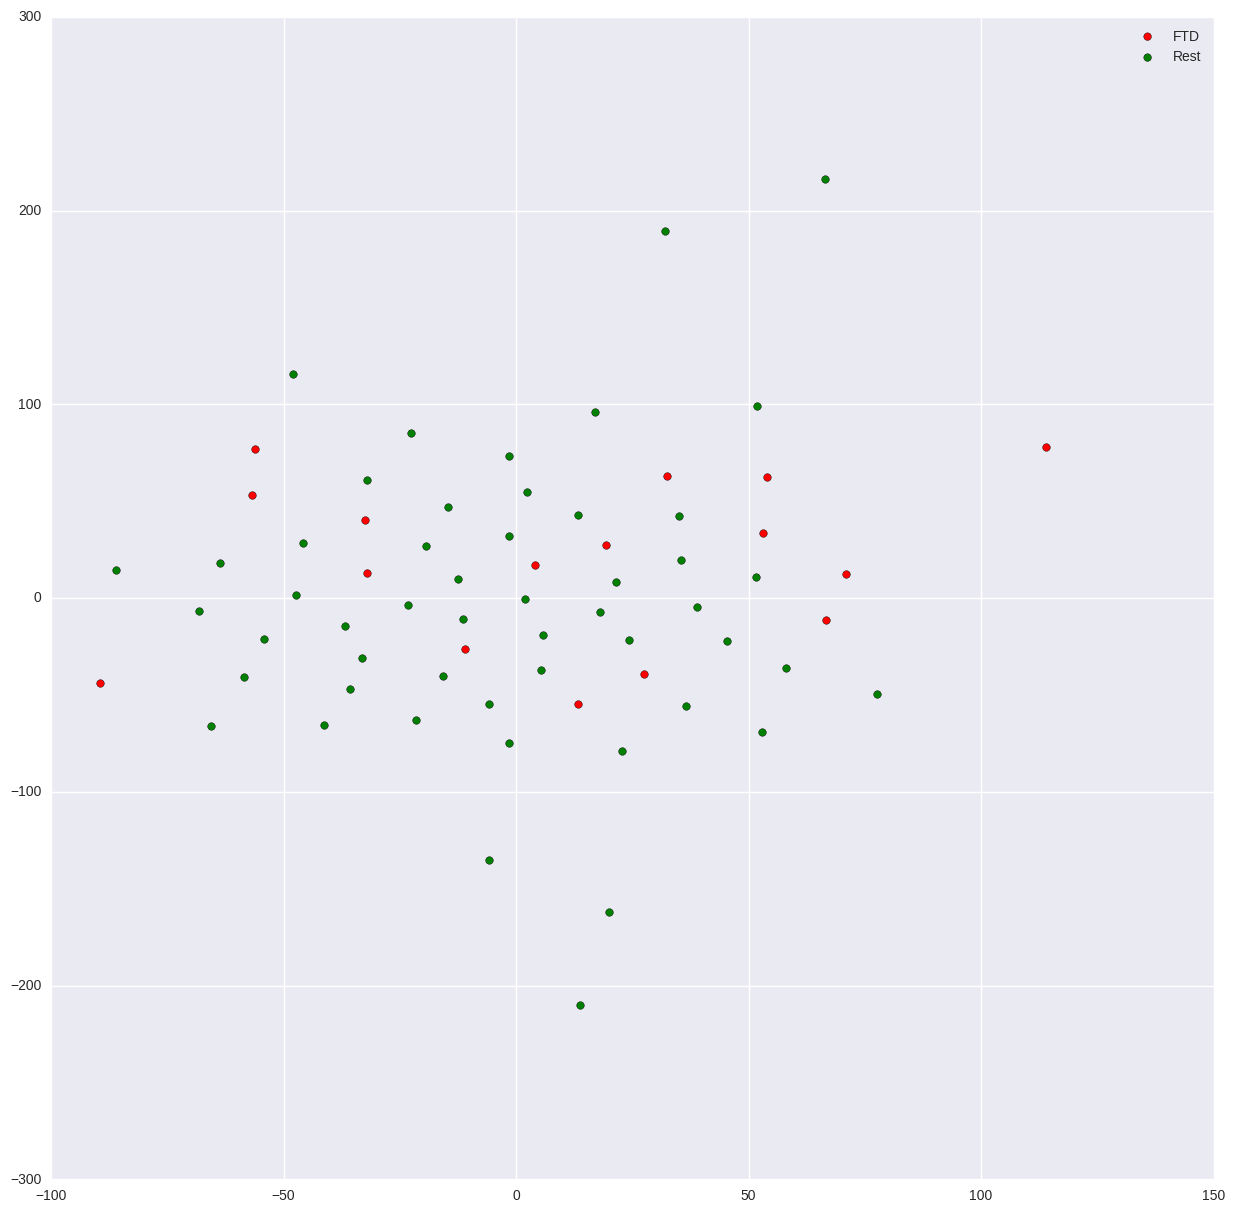

In [97]:
plt.figure(figsize=(15, 15))
make_scatter(embeddings[kl_div_idx], id_ftd, id_neurol, id_psych)